![alt text]( "OY Analytica")

# OY Analytica - An Open AI Community 
[github.com/oyanalytica](https://github.com/oyanalytica) 
<a href='https://twitter.com/oyanalytica'> </a>

In [227]:
import pandas as pd

# read the data

In [228]:
data= pd.read_csv("Wines.csv")

In [229]:
data

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [230]:
y=data['Class']

In [231]:
y_cat= pd.get_dummies(y)

In [232]:
x=data.drop('Class', axis=1)

In [233]:
import seaborn as sns

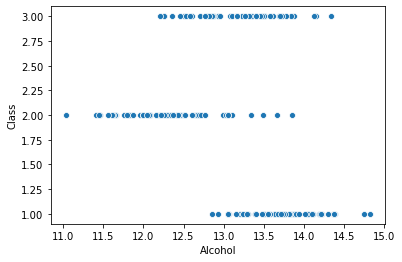

In [234]:
sns.scatterplot(x='Alcohol',y='Class',data=data)

In [235]:
from keras.models import Sequential

In [236]:
model=Sequential()

# Create the layers and add the Neurons

In [237]:
from keras.layers import Dense

In [238]:
model.add(Dense(units=5, input_shape=(13, ), activation='relu', kernel_initializer='he_normal' ))

In [239]:
model.add(Dense(units=8,  activation='relu', kernel_initializer='he_normal' ))

In [240]:
model.add(Dense(units=8,  activation='relu', kernel_initializer='he_normal' ))

In [241]:
model.add(Dense(units=3,  activation='softmax'))#, kernel_initializer='zeros', ))

In [242]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 27        
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [243]:
model.get_config()

{'name': 'sequential_6',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_28_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_28',
    'trainable': True,
    'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_29',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'cla

In [244]:
from keras.optimizers import RMSprop

In [245]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [246]:
model.fit(x,y_cat,epochs=150)

Epoch 1/150
6/6 [==============================] - 7s 6ms/step - loss: 154.7646 - accuracy: 0.3372
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 127.1851 - accuracy: 0.2374
Epoch 3/150
6/6 [==============================] - 0s 5ms/step - loss: 110.1366 - accuracy: 0.2448
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 102.3365 - accuracy: 0.2228
Epoch 5/150
6/6 [==============================] - 0s 7ms/step - loss: 109.2474 - accuracy: 0.2651
Epoch 6/150
6/6 [==============================] - 0s 5ms/step - loss: 94.2920 - accuracy: 0.3743
Epoch 7/150
6/6 [==============================] - 0s 5ms/step - loss: 102.0265 - accuracy: 0.4011
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 74.8982 - accuracy: 0.5302
Epoch 9/150
6/6 [==============================] - 0s 5ms/step - loss: 72.5260 - accuracy: 0.5030
Epoch 10/150
6/6 [==============================] - 0s 5ms/step - loss: 68.0061 - accuracy: 0.4090
Epoch 11/150


6/6 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.6343
Epoch 85/150
6/6 [==============================] - 0s 4ms/step - loss: 0.8215 - accuracy: 0.5688
Epoch 86/150
6/6 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.6352
Epoch 87/150
6/6 [==============================] - 0s 5ms/step - loss: 0.7899 - accuracy: 0.5932
Epoch 88/150
6/6 [==============================] - 0s 4ms/step - loss: 0.7280 - accuracy: 0.6595
Epoch 89/150
6/6 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.6515
Epoch 90/150
6/6 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.6381
Epoch 91/150
6/6 [==============================] - 0s 5ms/step - loss: 0.8059 - accuracy: 0.5936
Epoch 92/150
6/6 [==============================] - 0s 4ms/step - loss: 0.7240 - accuracy: 0.6683
Epoch 93/150
6/6 [==============================] - 0s 4ms/step - loss: 0.7225 - accuracy: 0.6464
Epoch 94/150
6/6 [===============

In [247]:
l=model.history.history['loss']

In [248]:
l1=pd.DataFrame(l)

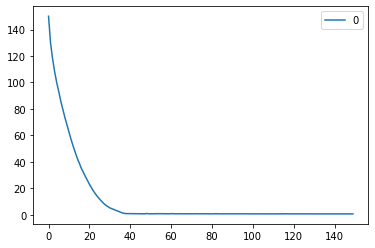

In [249]:
l1.plot()

In [250]:
a=model.history.history['accuracy']

In [251]:
a1=pd.DataFrame(a)

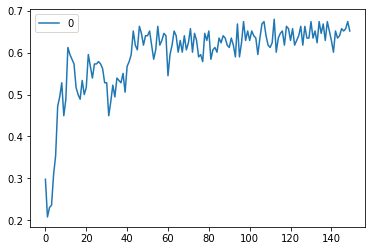

In [252]:
a1.plot()

In [253]:
x.iloc[2].values

array([1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
       3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
       1.185e+03])

In [254]:
# to check it is class 1 or not
model.predict([[1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
       3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
       1.185e+03]])

array([[0.996899  , 0.00155965, 0.00154138]], dtype=float32)

In [255]:
x.iloc[98].values

array([1.237e+01, 1.070e+00, 2.100e+00, 1.850e+01, 8.800e+01, 3.520e+00,
       3.750e+00, 2.400e-01, 1.950e+00, 4.500e+00, 1.040e+00, 2.770e+00,
       6.600e+02])

In [256]:
# to check it is class 2 or not
model.predict([[1.237e+01, 1.070e+00, 2.100e+00, 1.850e+01, 8.800e+01, 3.520e+00,
       3.750e+00, 2.400e-01, 1.950e+00, 4.500e+00, 1.040e+00, 2.770e+00,
       6.600e+02]])

array([[0.4339872 , 0.10747939, 0.4585335 ]], dtype=float32)

In [257]:
x.iloc[150].values

array([1.35e+01, 3.12e+00, 2.62e+00, 2.40e+01, 1.23e+02, 1.40e+00,
       1.57e+00, 2.20e-01, 1.25e+00, 8.60e+00, 5.90e-01, 1.30e+00,
       5.00e+02])

In [258]:
# to check it is class 3 or not
model.predict([[1.35e+01, 3.12e+00, 2.62e+00, 2.40e+01, 1.23e+02, 1.40e+00,
       1.57e+00, 2.20e-01, 1.25e+00, 8.60e+00, 5.90e-01, 1.30e+00,
       5.00e+02]])

array([[0.01822429, 0.41622758, 0.5655481 ]], dtype=float32)

# Completed